### Importing required libraries

In [ ]:
!pip install wordcloud

In [1]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import regular expression
import re

# import ast
import ast

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder , ordinal encoder , onehot encoder 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import KFold,GridSearchCV

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import statsmodels
import statsmodels.api as sma

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import wordlcoud, stopwords
from wordcloud import WordCloud,STOPWORDS


In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [8,8]

# Creating custom color
colors = ['#97C1A9','#DCDCDC','#AFC197','#9AC197','#97C1BE','#97C1A2','#C1979A',
          '#A997C1','#77AE8F','#DCDCDC','#67A481','#C197AF']

### Reading the dataset and viewing the first 10 rows of it

In [3]:
pd.set_option('display.max_columns',20)

In [4]:
df_hotel = pd.read_csv('Hotel Reservations.csv')
df_hotel.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


### Checking the shape/dimension of the dataset¶

In [5]:
print(f'The dataset has {df_hotel.shape[0]} rows and {df_hotel.shape[1]} columns')

The dataset has 36275 rows and 19 columns


In [6]:
print(f'Dimension of the dataset is {df_hotel.ndim}')

Dimension of the dataset is 2


### Checking the datatype, number of non null values and name of each variable in the dataset

In [7]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Checking for the missing values. Displaying number of missing values per column

In [8]:
missing_values = pd.DataFrame({'No of missing values': df_hotel.isnull().sum(),
                              '% of missing values': (df_hotel.isnull().sum()/df_hotel.shape[0])*100}
                             ).reset_index().rename(columns = {'index':'Name'})

missing_values

,Name,No of missing values,% of missing values
0,Booking_ID,0,0.0
1,no_of_adults,0,0.0
2,no_of_children,0,0.0
3,no_of_weekend_nights,0,0.0
4,no_of_week_nights,0,0.0
5,type_of_meal_plan,0,0.0
6,required_car_parking_space,0,0.0
7,room_type_reserved,0,0.0
8,lead_time,0,0.0
9,arrival_year,0,0.0


From above dataframe we can see that there are no missing values present in the dataset

### Dropping of irrelevant columns from the dataset

The variable booking id is a unqiue identfier of each booking. This variable can be dropped as it might not contribute much to the prediction booking status or might impute noise to the model.

In [9]:
df_hotel.drop(columns = 'Booking_ID', inplace = True)

### Checking for the descriptive statistics of the dataset

In [10]:
df_hotel.describe(include = 'object').T

,count,unique,top,freq
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [11]:
df_hotel.shape

(36275, 18)

In [12]:
round(df_hotel['booking_status'].value_counts(normalize=True)*100)

Not_Canceled    67.0
Canceled        33.0
Name: booking_status, dtype: float64

### Checking for the summary statistics of the dataset

In [13]:
df_hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


### Univariate Analysis

#### Type_of_meal_plan

This variable explain the type of meal plan booked by the customer

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]

df_hotel['type_of_meal_plan'].unique()

In [ ]:
sns.countplot(df_hotel['type_of_meal_plan'].sort_values(),palette = colors)
plt.title('Frequency of Type of Meal Plan')
# plt.savefig("Frequency of Type of Meal Plan.jpeg")

for i,v in enumerate(df_hotel['type_of_meal_plan'].value_counts().sort_index()):
    plt.text( x = i , y = v + 100, s = v, ha = 'center')
    
plt.savefig("Frequency of Type of Meal Plan.jpeg")

Inference:

From above countplot it is clearly evident that meal plan 1 is prefered by most of the customers. It is followed by not selected and meal plan 2 with count of 5130 and 3305. Only a few customer prefer meal plan 3

#### Room_type_reserved

It explains the type of room reserved by the customer.

In [ ]:
sns.countplot(df_hotel['room_type_reserved'].sort_values(),palette= colors)
plt.title('Frequency of Room Type Reserved')
plt.xticks(rotation = 90)

for i,v in enumerate(df_hotel['room_type_reserved'].value_counts().sort_index()):
    plt.text( x = i , y = v + 300, s = v, ha = 'center')

plt.savefig("Frequency of Room Type Reserved.jpeg")

In [ ]:
df_hotel.groupby(["room_type_reserved"])["avg_price_per_room"].mean()

#### Market_segment_type

The "Market Segment" refers to the designation or classification of the source of the booking made by the guest. It is a categorical variable that provides information about the type of customer or entity that made the reservation.

In [ ]:
sns.countplot(df_hotel['market_segment_type'].sort_values(),palette= colors)
plt.title('Count of Market Segment Type')
plt.xticks(rotation = 45)

for i,v in enumerate(df_hotel['market_segment_type'].value_counts().sort_index()):
    plt.text( x = i , y = v + 200, s = v, ha = 'center')
    
plt.savefig('Count of Market Segment Type.jpeg')

Inference: 

From above plot it is clearly evident that customers who reserved rooms through online modes is higher compared to other modes of reservation.
The industry is driven by the online bookings offlate, and more thoughts on the cancellation of online cancellation should be given a thought

#### No_of_adults

The "number of adults" refers to the number of guests over the age of 18 who will be occupying a hotel room

In [ ]:
df_hotel['no_of_adults'].unique()

In [ ]:
sns.countplot(df_hotel['no_of_adults'].sort_values(),palette = colors)
plt.title('Breakdown of No of Adults')

for i,v in enumerate(df_hotel['no_of_adults'].value_counts().sort_index()):
    plt.text( x = i , y = v + 200, s = v, ha = 'center')

plt.savefig("Breakdown of No of Adults.jpeg")

#### No_of_children

The "number of children" refers to the number of guests below the age of 18 who will be occupying a hotel room

In [ ]:
sns.countplot(df_hotel['no_of_children'].sort_values(),palette = colors)
plt.title('Breakdown of No of Children')

for i,v in enumerate(df_hotel['no_of_children'].value_counts().sort_index()):
    plt.text( x = i , y = v + 350, s = v, ha = 'center')

plt.savefig("Breakdown of No of Children.jpeg")

#### No_of_weekend_nights

The "no_of_weekend_nights" variable refers to the number of weekend nights (i.e., Saturday, or Sunday nights) that a guest will be staying at the hotel as part of their reservation. 

In [ ]:
sns.countplot(df_hotel['no_of_weekend_nights'].sort_values(),palette = colors)
plt.title('Frequency of No of Weekend Nights')

for i,v in enumerate(df_hotel['no_of_weekend_nights'].value_counts().sort_index()):
    plt.text( x = i , y = v + 350, s = v, ha = 'center')
    
plt.savefig("Frequency of No of Weekend Nights.jpeg")

#### No_of_week_nights

It is the number of weekday nights (i.e., Monday to Friday nights) that a guest will be staying at the hotel as part of their reservation.

In [ ]:
sns.countplot(df_hotel['no_of_week_nights'].sort_values(),palette = colors)
plt.title('Investigating the Frequency of No of Week Nights')

for i,v in enumerate(df_hotel['no_of_week_nights'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')
plt.savefig("Investigating the Frequency of No of Week Nights.jpeg")

#### Lead_time

It is the amount of time between when a guest makes a reservation and when their planned arrival date at the hotel is. It is a measure of how much advance notice the hotel has before the guest arrives.

In [ ]:
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot(df_hotel['no_of_week_nights'].sort_values(),palette = colors)
plt.title('Investigating the Frequency of Lead Time')

for i,v in enumerate(df_hotel['no_of_week_nights'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')

plt.savefig("Investigating the Frequency of Lead Time.jpeg")

#### Arrival_year

"Arrival year" refers to the year in which a guest is scheduled to arrive for their reservation at a hotel. 

In [ ]:
plt.pie(df_hotel['arrival_year'].value_counts(), labels = df_hotel['arrival_year'].value_counts().index,
        autopct = '%.2f%%', shadow = True, explode = [0.1,0.05],colors = colors)
plt.title('Proportions of Bookings Yearly')


plt.savefig("Proportions of Bookings Yearly.jpeg")

plt.show()

Inference: 
The given data Set is dominated by the 2018 data, or the bookings have boosted high in the year 2018

#### Arrival_month

"Arrival month" refers to the month in which a guest is scheduled to arrive for their reservation at a hotel.

In [ ]:
plt.pie(df_hotel['arrival_month'].value_counts(), labels = df_hotel['arrival_month'].value_counts().index,
        autopct = '%.1f%%', shadow = True,colors = colors )
plt.title('Proportions of monthly bookings')

plt.savefig('Proportions of monthly bookings.jpeg')
plt.show()

Inference: 
8,9,10 has the highest no bookings. which is August, September and November. So in the financial year perspective 2nd and 3rd has the highest footfall / bookings
There is a scope for feature engineering  for this column, to bin the months quarter wise or bin it season wise to establish better pattern with the target variable


#### Repeated_guest

This variable explains whether a guest who made a hotel reservation has stayed at the same hotel before.

In [ ]:
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot(df_hotel['repeated_guest'].sort_values(),palette = colors)
plt.title('Frequency of Repeated Guest')

for i,v in enumerate(df_hotel['repeated_guest'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')

plt.savefig("Frequency of Repeated Guest.jpeg")

#### No_of_previous_cancellations

"No of previous cancellations" refers to the number of times a guest has previously cancelled a reservation at the hotel

In [ ]:
sns.countplot(df_hotel['no_of_previous_cancellations'].sort_values(),palette = colors)
plt.title('Breakdown of No of Previous Cancellations')

for i,v in enumerate(df_hotel['no_of_previous_cancellations'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')
    
plt.savefig("Breakdown of No of Previous Cancellations.jpeg")

#### Avg_price_per_room

Average price per day of the reservation; prices of the rooms are dynamic. (in Dollars)

In [ ]:
sns.distplot(df_hotel['avg_price_per_room'], color = '#97C1A9')
plt.title('Understanding the distribution of Average Price Per Room')
plt.show()

#### No_of_special_requests

The "Number of special requests" in the Hotel Reservations dataset refers to the number of additional services or special requests made by a guest when booking a hotel reservation. 

In [ ]:
sns.countplot(df_hotel['no_of_special_requests'].sort_values(),palette = colors)
plt.title('Breakdown of No of Special Requests')

for i,v in enumerate(df_hotel['no_of_special_requests'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')
    
plt.savefig('Breakdown of No of Special Requests.jpeg')

In [ ]:
round(df_hotel["no_of_special_requests"].value_counts(normalize= True)*100)

#### Booking_status

Flag indicating if the booking was canceled or not. This is the target variable

In [ ]:
plt.pie(df_hotel['booking_status'].value_counts(), labels = df_hotel['booking_status'].value_counts().index,
        autopct = '%.2f%%', shadow = True, explode = [0.05,0.025],colors = colors)
plt.title('Distribution of Booking status')
plt.savefig('Distribution of Booking status.jpeg')
plt.show()


From the above distribution it is clearly evident that there is class imbalance in the target variable

### Bivariate Analysis

#### Avg_price_per_room vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['booking_status'].sort_values(), y = df_hotel['avg_price_per_room'],palette= colors)
plt.title('Examining the Variability of Average Price Per Room in Booking Status')

for i,v in enumerate(round(df_hotel.groupby('booking_status')['avg_price_per_room'].mean(),2)):
    plt.text(x = i , y = v + 2, s = v , ha = 'center')
    
plt.savefig("Examining the Variability of Average Price Per Room in Booking Status.jpeg")

#### No_of_week_nights vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['booking_status'].sort_values(), y = df_hotel['no_of_week_nights'],palette = colors)
plt.title('Examining the Variability of No of Week Nights in Booking Status')

for i,v in enumerate(round(df_hotel.groupby('booking_status')['no_of_week_nights'].mean(),2)):
    plt.text(x = i , y = v , s = v , ha = 'center')
    
plt.savefig('Examining the Variability of No of Week Nights in Booking Status.jpeg')

Inference: 
This plot can help us visualize how booking status varies with the length of the stay. For example, we might find that bookings with longer weeknight stays are more likely to result in a cancellation

#### No_of_adults vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['booking_status'].sort_values(), y = df_hotel['no_of_adults'], palette = colors)
plt.title('Examining the Variability of No of Adults in Booking Status')

for i,v in enumerate(round(df_hotel.groupby('booking_status')['no_of_adults'].mean())):
    plt.text(x = i , y = v - 0.5, s = v , ha = 'center')
    
plt.savefig('Examining the Variability of No of Adults in Booking Status.jpeg')

#### Type_of_meal_plan vs Booking_status

In [ ]:
sns.countplot(x = df_hotel['type_of_meal_plan'] , hue = df_hotel['booking_status'],palette = colors)
plt.title('Describing the Count of Type of Meal Plan by Booking Status')
plt.savefig('Describing the Count of Type of Meal Plan by Booking Status.jpeg')
plt.show()

#### Repeated_guest vs Booking_status

In [ ]:
sns.countplot(x = df_hotel['repeated_guest'] , hue = df_hotel['booking_status'],palette = colors)
plt.title('Describing the Count of Repeated Guests by Booking Status')
plt.savefig("Describing the Count of Repeated Guests by Booking Status.jpeg")
plt.show()

#### No_of_weekend_nights vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['booking_status'] , y = df_hotel['no_of_weekend_nights'],palette = colors)
plt.title('Examining the Variability of No of Weekend Nights in Booking Status')

for i,v in enumerate(round(df_hotel.groupby('booking_status')['no_of_weekend_nights'].mean())):
    plt.text(x = i , y = v - 0.2, s = v , ha = 'center')

plt.savefig("Examining the Variability of No of Weekend Nights in Booking Status.jpeg")

#### Room_type_reserved vs Booking_status

In [ ]:
sns.countplot(x = df_hotel['room_type_reserved'] , hue = df_hotel['booking_status'],palette = colors)
plt.title('Describing the Count of Room Type Reserved by Booking Status')
plt.savefig("Describing the Count of Room Type Reserved by Booking Status.jpeg")
plt.show()

#### Required_car_parking_space vs Avg_price_per_room

In [ ]:
sns.barplot(x = df_hotel['required_car_parking_space'] , y = df_hotel['avg_price_per_room'],palette = colors)
plt.title('Examining the Variability of Average Price Per Room in Required Car Parking Space')

for i,v in enumerate(round(df_hotel.groupby('required_car_parking_space')['avg_price_per_room'].mean(),2)):
    plt.text(x = i , y = v + 3, s = v , ha = 'center')
    
plt.savefig("Examining the Variability of Average Price Per Room in Required Car Parking Space.jpeg")

#### Type_of_meal_plan vs Avg_price_per_room

In [ ]:
sns.barplot(x = df_hotel['type_of_meal_plan'].sort_values() , y = df_hotel['avg_price_per_room'],palette = colors)
plt.title('Examining the Variability of Average Price Per Room in Type of Meal Plan')

for i,v in enumerate(round(df_hotel.groupby('type_of_meal_plan')['avg_price_per_room'].mean(),2)):
    plt.text(x = i , y = v + 3, s = v , ha = 'center')
    
plt.savefig("Examining the Variability of Average Price Per Room in Type of Meal Plan.jpeg")

#### Market_segment_type vs Booking_status

In [ ]:
sns.countplot(x = df_hotel['market_segment_type'] , hue = df_hotel['booking_status'],palette = colors)
plt.title('Comparison of Market Segment Type by Booking Status')
plt.savefig("Comparison of Market Segment Type by Booking Status.jpeg")
plt.show()

#### No_of_week_nights vs Avg_price_per_room

In [ ]:
sns.scatterplot(x = df_hotel['no_of_week_nights'], y = df_hotel['avg_price_per_room'])
plt.title('Visualizing the Spread of Average Price Per Room in No of Week Nights')
plt.savefig('Visualizing the Spread of Average Price Per Room in No of Week Nights.jpeg')
plt.show()

#### No_of_weekend_nights vs Avg_price_per_room

In [ ]:
sns.scatterplot(x = df_hotel['no_of_weekend_nights'], y = df_hotel['avg_price_per_room'])
plt.title('Visualizing the Spread of Average Price Per Room in No of Weekend Nights')
plt.savefig('Visualizing the Spread of Average Price Per Room in No of Weekend Nights.jpeg')
plt.show()

### Multivariate Analysis

#### Type_of_meal_plan vs Avg_price_per_room vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['type_of_meal_plan'].sort_values() , y = df_hotel['avg_price_per_room'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Exploring the Interactions among Type of Meal Plan , Average Price Per Room , Booking Status')

for i,v in enumerate(round(df_hotel.groupby(['type_of_meal_plan','booking_status']
                                           )['avg_price_per_room'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 3, s = v , ha = 'center')
    
plt.savefig('Exploring the Interactions among Type of Meal Plan , Average Price Per Room , Booking Status.jpeg')

#### Room_type_reserved vs Avg_price_per_room vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['room_type_reserved'].sort_values() , y = df_hotel['avg_price_per_room'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Exploring the Interactions among Room Type Reserved , Average Price Per Room , Booking Status')

for i,v in enumerate(round(df_hotel.groupby(['room_type_reserved','booking_status']
                                           )['avg_price_per_room'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 3, s = v , ha = 'center')
    
plt.savefig('Exploring the Interactions among Room Type Reserved , Average Price Per Room , Booking Status.jpeg')

#### Market_segment_type vs Avg_price_per_room vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['market_segment_type'], y = df_hotel['avg_price_per_room'], hue = df_hotel['booking_status'], 
            palette = colors)
plt.title('Examining the Predictive Power of Market Segment Type and Average Price Per Room on Booking_status')
plt.savefig('Examining the Predictive Power of Market Segment Type and Average Price Per Room on Booking_status.jpeg')
plt.show()

#### Room_type_reserved vs No_of_weekend_nights vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['room_type_reserved'].sort_values() , y = df_hotel['no_of_weekend_nights'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Examining the Predictive Power of Room Type Reserved and No of Weekend Nights on Booking_status')

for i,v in enumerate(round(df_hotel.groupby(['room_type_reserved','booking_status']
                                           )['no_of_weekend_nights'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 0.05, s = v , ha = 'center')
    
plt.savefig('Examining the Predictive Power of Room Type Reserved and No of Weekend Nights on Booking_status.jpeg')

#### Room_type_reserved vs No_of_week_nights vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['room_type_reserved'].sort_values() , y = df_hotel['no_of_week_nights'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Exploring the Interactions among Room Type Reserved , No of Week Nights , Booking_status')

for i,v in enumerate(round(df_hotel.groupby(['room_type_reserved','booking_status']
                                           )['no_of_week_nights'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 0.05, s = v , ha = 'center')
    
plt.savefig('Exploring the Interactions among Room Type Reserved , No of Week Nights , Booking_status.jpeg')

#### Repeated_guest vs No_of_weekend_nights vs Booking_status

In [ ]:
sns.barplot(x = df_hotel['repeated_guest'].sort_values() , y = df_hotel['no_of_weekend_nights'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Exploring the Interactions among Repeated Guest , No of Weekend Nights , Booking_status')

for i,v in enumerate(round(df_hotel.groupby(['repeated_guest','booking_status']
                                           )['no_of_weekend_nights'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 0.05, s = v , ha = 'center')

plt.savefig('Exploring the Interactions among Repeated Guest , No of Weekend Nights , Booking_status.jpeg')

#### No_of_week_nights vs Avg_price_per_room vs Booking_status

In [ ]:
sns.scatterplot(x = df_hotel['no_of_week_nights'] , y = df_hotel['avg_price_per_room'], 
                hue = df_hotel['booking_status'])

plt.title('Visualizing the Spread of No of Week Nights and Average Price Per Room on Booking Status')
plt.savefig('Visualizing the Spread of No of Week Nights and Average Price Per Room on Booking Status.jpeg')

plt.show()

#### No_of_weekend_nights vs Avg_price_per_room vs Booking_status

In [ ]:
sns.scatterplot(x = df_hotel['no_of_weekend_nights'] , y = df_hotel['avg_price_per_room'], hue = df_hotel['booking_status'])
plt.title('Visualizing the Spread of No of Weekend Nights and Average Price Per Room on Booking Status')
plt.savefig('Visualizing the Spread of No of Weekend Nights and Average Price Per Room on Booking Status.jpeg')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(df_hotel.corr(), annot = True, cmap = "Blues" , mask = np.triu(df_hotel.corr()))
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.jpeg')
plt.show()

### Performing hypothesis testing to find the significant variables

Hypothesis :

H0 : There is no significant relationship between the dependent and independent variable

Ha : There is significant relationship between the dependent and independent variable

Significance level :

Considering significance level as 0.05

In [ ]:
# No_of_adults is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_adults'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between no of adults and booking status

In [ ]:
# No_of_children is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_children'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_children and booking status

In [ ]:
# No_of_weekend_nights is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_weekend_nights'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_weekend_nights and booking status

In [ ]:
# No_of_week_nights is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_week_nights'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_week_nights and booking status

In [ ]:
# Type_of_meal_plan is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['type_of_meal_plan'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

since pvalue is less than significance level, reject H0. There is significant relationship between type_of_meal_plan and booking status

In [ ]:
# Required_car_parking_space is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['required_car_parking_space'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

since pvalue is less than significance level, reject H0. There is significant relationship between required_car_parking_space and booking status

In [ ]:
# Room_type_reserved is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['room_type_reserved'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

since pvalue is less than significance level, reject H0. There is significant relationship between room_type_reserved and booking status

In [ ]:
# Lead_time is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['lead_time'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between lead_time and booking status

In [ ]:
# Market_segment_type is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['market_segment_type'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

since pvalue is less than significance level, reject H0. There is significant relationship between market_segment_type and booking status

In [ ]:
# Repeated_guest is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['repeated_guest'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

since pvalue is less than significance level, reject H0. There is significant relationship between repeated_guest and booking status

In [ ]:
# No_of_previous_cancellations is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_previous_cancellations'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_previous_cancellations and booking status

In [ ]:
# No_of_previous_bookings_not_canceled is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_previous_bookings_not_canceled'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_previous_bookings_not_canceled and booking status

In [ ]:
# Avg_price_per_room is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['avg_price_per_room'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between avg_price_per_room and booking status

In [ ]:
# No_of_special_requets is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_special_requests'],df_hotel['booking_status'])

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_special_requests and booking status

###### Insights from statistical tests
From above performed statistical tests we can conclude that none of the columns has failed to reject null hypotheses which means none of the columns are insignificant to the target variable booking_status. At this stage we cant drop any variable. On further progress after building few models and checking for their metrics if the performance is considerably low we can drop some columns based on the feature_importance score.

### Splitting the dataset randomly into train and test dataset using ratio of 70:30 

In [14]:
df_hotel = df_hotel.drop(columns="arrival_year")

In [15]:
x = df_hotel.drop(columns= 'booking_status')
y = df_hotel["booking_status"]

In [16]:
xtrain , xtest , ytrain , ytest = train_test_split(x, y, test_size = 0.30, random_state = 7, stratify=y)

### Checking and treating of outliers¶

In [17]:
plt.rcParams["figure.figsize"] = [8,5]

In [18]:
num_cols = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time',
            'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room']

For Train Data 

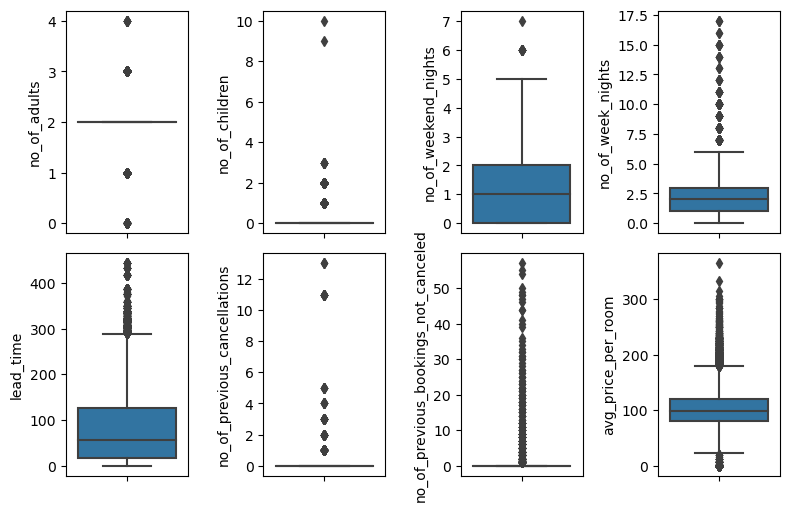

In [19]:
f,ax = plt.subplots(2,4)
for i, v in zip(num_cols, ax.flatten()):
    sns.boxplot(y = xtrain[i], ax = v)
    
plt.tight_layout()
plt.show()

For Test Data 

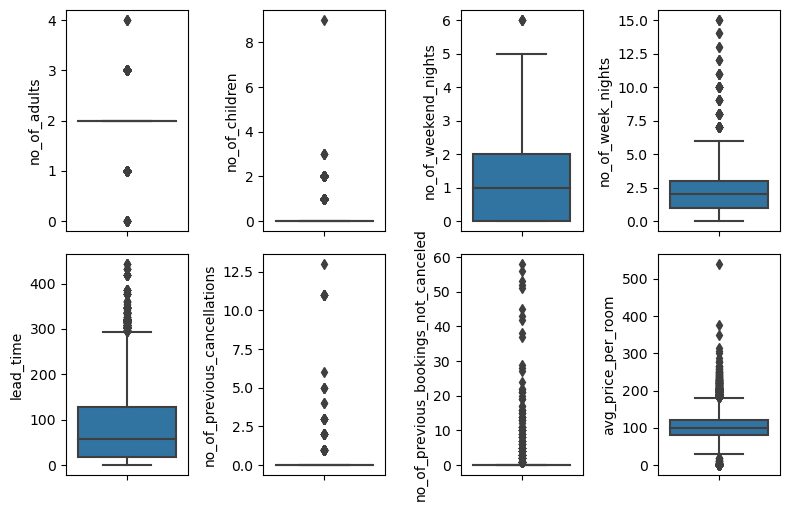

In [20]:
f,ax = plt.subplots(2,4)
for i, v in zip(num_cols, ax.flatten()):
    sns.boxplot(y = xtest[i], ax = v)
    
plt.tight_layout()
plt.show()

From the above it is clearly evident that there are outliers in both train annd test data. By doin IQR we tend to lose data, therefore we proceed to do Power Transformer.

In [21]:
out_cols =['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time',
            'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']

In [24]:
import pickle

In [25]:
pt = PowerTransformer()

for i in out_cols:
    variable = pt.fit(xtrain[[i]])
    xtrain[i] = pt.transform(xtrain[[i]])
    
#     with open(f'{i}.pkl','wb') as file:
#         pickle.dump(variable,file)
    
    xtest[i] = pt.transform(xtest[[i]])

Since the Power Trasformation has inbuilt scaling feature , we are not scaling again 

### Encoding of categorical variables

#### Type_of_meal_plan

In [41]:
# with open("oe_market.pkl", "wb") as file:
#     pickle.dump(oe_market, file)

In [26]:
xtrain['type_of_meal_plan'].unique()

array(['Not Selected', 'Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

Type of meal plan variable is an ordinal categorical variable. It has a hierarchy between the subclasses. Meal plan type affects the price of room. Each plan has different prices.

In [27]:
xtrain.groupby('type_of_meal_plan')['avg_price_per_room'].mean().sort_values()

type_of_meal_plan
Meal Plan 3    -2.108397
Not Selected   -0.224513
Meal Plan 1     0.001513
Meal Plan 2     0.332682
Name: avg_price_per_room, dtype: float64

In [28]:

oe = OrdinalEncoder(categories = [['Meal Plan 3','Not Selected','Meal Plan 1', 'Meal Plan 2']])

oe_mealplan = oe.fit(xtrain[["type_of_meal_plan"]])

xtrain['type_of_meal_plan'] = oe_mealplan.transform(xtrain[['type_of_meal_plan']])
xtest['type_of_meal_plan'] = oe_mealplan.transform(xtest[['type_of_meal_plan']])

xtrain['type_of_meal_plan'].unique()


array([1., 2., 3., 0.])

#### Room_type_reserved

In [29]:
df_hotel['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

Room type variable is an ordinal categorical variable. It has a hierarchy between the subclasses. Different room price will be having different prices

In [30]:
xtrain.groupby('room_type_reserved')['avg_price_per_room'].mean().sort_values(ascending=True)

room_type_reserved
Room_Type 3   -0.814397
Room_Type 2   -0.464847
Room_Type 1   -0.203907
Room_Type 5    0.541580
Room_Type 4    0.618562
Room_Type 7    1.198991
Room_Type 6    2.102405
Name: avg_price_per_room, dtype: float64

In [31]:
oe = OrdinalEncoder(categories = [['Room_Type 3','Room_Type 2','Room_Type 1', 'Room_Type 5',
                                  'Room_Type 4','Room_Type 7','Room_Type 6']])

oe_roomtype = oe.fit(xtrain[["room_type_reserved"]])

xtrain['room_type_reserved'] = oe_roomtype.transform(xtrain[['room_type_reserved']])
xtest['room_type_reserved'] = oe_roomtype.transform(xtest[['room_type_reserved']])

xtrain['room_type_reserved'].unique()

array([2., 4., 6., 3., 1., 5., 0.])

#### Market_segment_type

In [32]:
xtrain['market_segment_type'].unique()

array(['Online', 'Offline', 'Corporate', 'Complementary', 'Aviation'],
      dtype=object)

Market segment type variable is an ordinal categorical variable. It has a hierarchy between the subclasses. For example when a corporate company does bulk booking there maybe slight discount in price of the room and for the customer who books through online has to pay more due to internet service charges , platform charges etc. Same can be applied also for other subclasses also

In [33]:
xtrain.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)

market_segment_type
Online           0.253924
Aviation        -0.045323
Offline         -0.316698
Corporate       -0.561118
Complementary   -3.236370
Name: avg_price_per_room, dtype: float64

From above groupby we can see that the prices for different market type the prices are different. There is an hierarchy followedFrom above groupby we can see that the prices for different market type the prices are different. There is an hierarchy followed

In [34]:
oe = OrdinalEncoder(categories = [['Complementary','Corporate','Offline','Aviation','Online']])

oe_market = oe.fit(xtrain[["market_segment_type"]])

xtrain['market_segment_type'] = oe_market.transform(xtrain[['market_segment_type']])
xtest['market_segment_type'] = oe_market.transform(xtest[['market_segment_type']])

xtrain['market_segment_type'].unique()

array([4., 2., 1., 0., 3.])

#### Booking_status

In [35]:
ytrain.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

For booking status variable we can replace not_canceled with 0 and cancelled as 1

In [36]:
ytrain.replace({'Not_Canceled':0,'Canceled':1}, inplace = True)
ytest.replace({'Not_Canceled':0,'Canceled':1}, inplace = True)

ytrain.unique()

array([0, 1], dtype=int64)

### Checking for imbalance in target variable

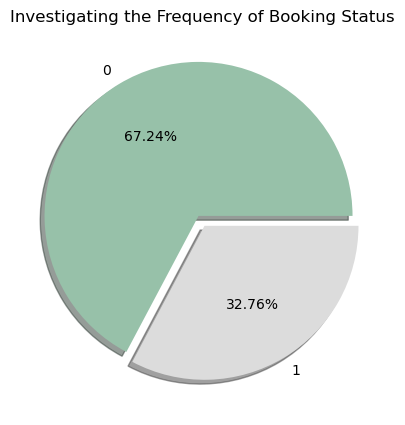

In [37]:
plt.pie(ytrain.value_counts(), labels = ytrain.value_counts().index,
        autopct = '%.2f%%', shadow = True, explode = [0.05,0.025],colors = colors)
plt.title('Investigating the Frequency of Booking Status')
plt.show()

In [38]:
ytrain.value_counts()

0    17073
1     8319
Name: booking_status, dtype: int64

From above plot it is clearly evident that there is class imbalance in the target variable. In class 0 there is 24390 instances and 11885 instances in class 1. We can do over sampling technique to overcome this imblalance

### Oversampling technique using SMOTE

For train data 

In [42]:
smtrain = SMOTE()

xtrain,ytrain = smtrain.fit_resample(xtrain,ytrain)

In [43]:
smtest = SMOTE()

xtest, ytest = smtest.fit_resample(xtest,ytest)

In [44]:
# Checking of instances after performing over sampling

ytrain.value_counts(normalize=True)

0    0.5
1    0.5
Name: booking_status, dtype: float64

From above value counts we can see that class imbalance is rectified

### Building a base model

Building a base model using Logistic Regression as it is having the highest explanatory power compared to other models

In [45]:
model_lr = sma.Logit(ytrain,sma.add_constant(xtrain)).fit()

Optimization terminated successfully.
         Current function value: 0.450916
         Iterations 29


##### checking for summary

In [46]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                34146
Model:                          Logit   Df Residuals:                    34129
Method:                           MLE   Df Model:                           16
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                  0.3495
Time:                        16:50:17   Log-Likelihood:                -15397.
converged:                       True   LL-Null:                       -23668.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.4485   1.48e+05  -3.03e-06      1.000    -2.9e+05     2.9e+05
no_of_adults                            -0.0370      0.017     -2.240      0.025      -0.069      -0.005
no_of_children                          -0.0132      0.016     -0.831      0.406      -0.045       0.018
no_of_weekend_nights                     0.0727      0.014      5.062      0.000       0.045       0.101
no_of_week_nights                       -0.0500      0.015     -3.397      0.001      -0.079      -0.021
type_of_meal_plan                       -0.1828      0.033     -5.512      0.000      -0.248      -0.118
required_car_parking_space              -2.1320      0.133    -16.077      0.000      -2.392      -1.872
room_type_reserved                      -0.1669      0.019     -8.960      0.000      -0.203      -0.130
lead_time                                1.4440      0.019     74.608      0.000       1.406       1.482
arrival_month                           -0.0635      0.005    -12.861      0.000      -0.073      -0.054
arrival_date                             0.0025      0.002      1.539      0.124      -0.001       0.006
market_segment_type                      0.7684      0.019     40.460      0.000       0.731       0.806
repeated_guest                         -41.1498   1.62e+07  -2.54e-06      1.000   -3.18e+07    3.18e+07
no_of_previous_cancellations             3.7475   1.54e+06   2.43e-06      1.000   -3.02e+06    3.02e+06
no_of_previous_bookings_not_canceled     0.3253      0.103      3.157      0.002       0.123       0.527
avg_price_per_room                       0.7324      0.022     33.200      0.000       0.689       0.776
no_of_special_requests                  -1.6181      0.025    -63.779      0.000      -1.668      -1.568
========================================================================================================
"""

#### Calculating various metrics to evaluate the model performance

In [47]:
pred_prob_train = model_lr.predict(sma.add_constant(xtrain))
pred_prob_test = model_lr.predict(sma.add_constant(xtest))

In [48]:
# Calculating youden's index to convert probability prediction to class prediction

# For train data

fpr , tpr , threshold = roc_curve(ytrain,pred_prob_train)

youden_index_train = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_train.append(res)

yi_train = max(np.round(youden_index_train,2))


# For test data

fpr , tpr , threshold = roc_curve(ytest,pred_prob_test)

youden_index_test = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_test.append(res)

yi_test = max(np.round(youden_index_test,2))

print(f'Youdens index for train data is {yi_train}')
print(f'Youdens index for test data is {yi_test}')

Youdens index for train data is 0.59
Youdens index for test data is 0.6


In [49]:
# Converting probability prediction to class prediction using 0.59 as threshold value

pred_train = [ 1 if i > 0.59 else 0  for i in pred_prob_train]
pred_test = [ 1 if i > 0.59 else 0  for i in pred_prob_test]


<AxesSubplot:>

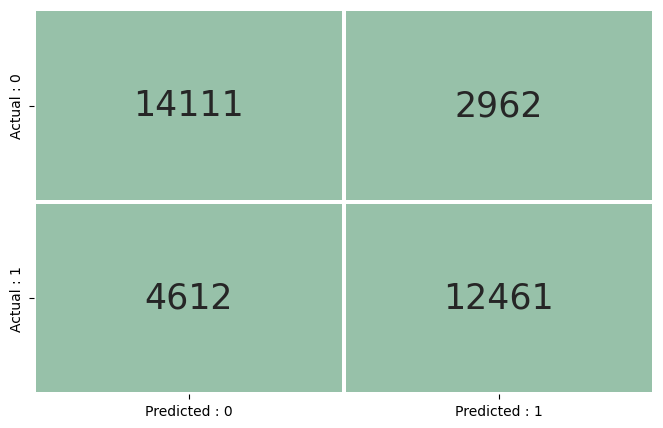

In [50]:
# plotting confusion matrix for train data

cm = confusion_matrix(ytrain,pred_train)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#97C1A9']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})

<AxesSubplot:>

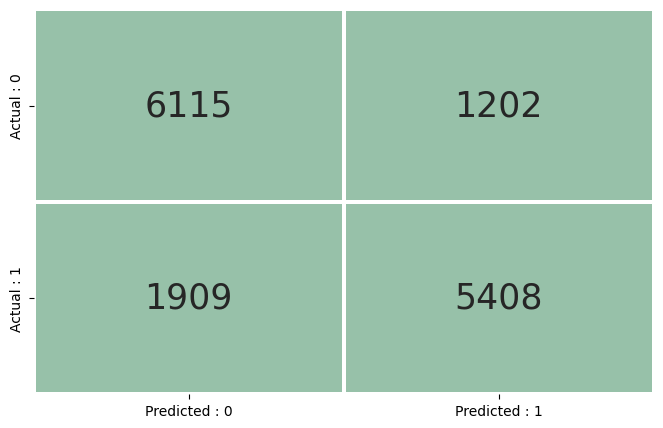

In [51]:
# plotting confusion matrix for test data

cm = confusion_matrix(ytest,pred_test)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#97C1A9']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})

In [52]:
# Classification report

print(f'Train report : \n{classification_report(ytrain,pred_train)}\n')
print(f'Testreport : \n{classification_report(ytest,pred_test)}')

Train report : 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     17073
           1       0.81      0.73      0.77     17073

    accuracy                           0.78     34146
   macro avg       0.78      0.78      0.78     34146
weighted avg       0.78      0.78      0.78     34146


Testreport : 
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      7317
           1       0.82      0.74      0.78      7317

    accuracy                           0.79     14634
   macro avg       0.79      0.79      0.79     14634
weighted avg       0.79      0.79      0.79     14634



From above report we can conclude that our base model has performed good in both train and unseen data with accuracy of almost 80%. On further progress we try to improve our performance by building other models, tuning their hyperparameters and selecting columns based on feature importance score

In [53]:
odds = pd.DataFrame(np.round(np.exp(model_lr.params),2))
odds.sort_values(by = 0 , ascending=False)

,0
no_of_previous_cancellations,42.42
lead_time,4.24
market_segment_type,2.16
avg_price_per_room,2.08
no_of_previous_bookings_not_canceled,1.38
no_of_weekend_nights,1.08
arrival_date,1.00
no_of_children,0.99
no_of_adults,0.96
no_of_week_nights,0.95


In [54]:
odds.sort_values(by = 0 , ascending=False)[0:8]

# the below extracted features has the highest influence on the target variable, according to the oddds ratio 

,0
no_of_previous_cancellations,42.42
lead_time,4.24
market_segment_type,2.16
avg_price_per_room,2.08
no_of_previous_bookings_not_canceled,1.38
no_of_weekend_nights,1.08
arrival_date,1.00
no_of_children,0.99


In [61]:
# Classification using logistic regression: 

from sklearn.linear_model import LogisticRegression

model_lr1 = LogisticRegression().fit(xtrain , ytrain)

model_performance_remarks(model_lr1, 'Base Model')

Train report 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79     17073
           1       0.78      0.81      0.79     17073

    accuracy                           0.79     34146
   macro avg       0.79      0.79      0.79     34146
weighted avg       0.79      0.79      0.79     34146

Test report 
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      7317
           1       0.79      0.82      0.80      7317

    accuracy                           0.80     14634
   macro avg       0.80      0.80      0.80     14634
weighted avg       0.80      0.80      0.80     14634



In [62]:
# Decision Tree Model 

dt = DecisionTreeClassifier()

model_dt = dt.fit(xtrain,ytrain)

model_performance_remarks(model_dt, 'Decision Tree')

Train report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      1.00     17073

    accuracy                           1.00     34146
   macro avg       1.00      1.00      1.00     34146
weighted avg       1.00      1.00      1.00     34146

Test report 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      7317
           1       0.84      0.77      0.80      7317

    accuracy                           0.81     14634
   macro avg       0.81      0.81      0.81     14634
weighted avg       0.81      0.81      0.81     14634



In [64]:
# Random Forest Model 

rf = RandomForestClassifier()

model_rf = rf.fit(xtrain,ytrain)

model_performance_remarks(model_rf, "Random Forest")

Train report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      1.00     17073

    accuracy                           1.00     34146
   macro avg       1.00      1.00      1.00     34146
weighted avg       1.00      1.00      1.00     34146

Test report 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7317
           1       0.91      0.88      0.89      7317

    accuracy                           0.90     14634
   macro avg       0.90      0.90      0.90     14634
weighted avg       0.90      0.90      0.90     14634



In [75]:
with open ("xg.pkl", "wb") as file:
    pickle.dump(model_xg, file)

In [65]:
# XGBoost Model:

xg = XGBClassifier()

model_xg = xg.fit(xtrain, ytrain)

model_performance_remarks(model_xg, "XGBoost")

Train report 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     17073
           1       0.94      0.92      0.93     17073

    accuracy                           0.93     34146
   macro avg       0.93      0.93      0.93     34146
weighted avg       0.93      0.93      0.93     34146

Test report 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7317
           1       0.89      0.91      0.90      7317

    accuracy                           0.90     14634
   macro avg       0.90      0.90      0.90     14634
weighted avg       0.90      0.90      0.90     14634



In [66]:
# Ada Boost Model 

ab = AdaBoostClassifier()

model_ab = ab.fit(xtrain,ytrain)

model_performance_remarks(model_ab, "AdaBoost")

Train report 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     17073
           1       0.82      0.82      0.82     17073

    accuracy                           0.82     34146
   macro avg       0.82      0.82      0.82     34146
weighted avg       0.82      0.82      0.82     34146

Test report 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      7317
           1       0.82      0.85      0.83      7317

    accuracy                           0.83     14634
   macro avg       0.83      0.83      0.83     14634
weighted avg       0.83      0.83      0.83     14634



In [ ]:
# Grid Search CV -- RF params 

params = ({"n_estimators" :range(100,200,25),
    "criterion" :['gini','entropy'],
    "max_depth": range(1,6,1),
    "min_samples_split" : range(1,10,2),
    "min_samples_leaf" : range(1,5,1),
    "max_features" : ['sqrt','log2']})
          
cv = GridSearchCV(estimator=rf,param_grid=params, cv = 3, n_jobs=-1, 
                 verbose=5, return_train_score="f1")
          
cv.fit(xtrain,ytrain)

cv.best_score_

In [ ]:
model_grid = cv.best_estimator_.fit(xtrain,ytrain)

model_performance(model_grid, "GridSearchCV")

In [ ]:
# pip install catboost

In [67]:
from catboost import CatBoostClassifier

In [68]:
cb = CatBoostClassifier()

model_cb = cb.fit(xtrain, ytrain)

Learning rate set to 0.046523
0:	learn: 0.6646920	total: 173ms	remaining: 2m 52s
1:	learn: 0.6374858	total: 200ms	remaining: 1m 39s
2:	learn: 0.6176944	total: 228ms	remaining: 1m 15s
3:	learn: 0.5965556	total: 259ms	remaining: 1m 4s
4:	learn: 0.5736674	total: 284ms	remaining: 56.5s
5:	learn: 0.5576657	total: 304ms	remaining: 50.4s
6:	learn: 0.5431500	total: 326ms	remaining: 46.2s
7:	learn: 0.5296492	total: 349ms	remaining: 43.2s
8:	learn: 0.5182981	total: 372ms	remaining: 40.9s
9:	learn: 0.5064734	total: 393ms	remaining: 38.9s
10:	learn: 0.4962627	total: 415ms	remaining: 37.3s
11:	learn: 0.4876666	total: 441ms	remaining: 36.3s
12:	learn: 0.4804615	total: 463ms	remaining: 35.2s
13:	learn: 0.4717699	total: 486ms	remaining: 34.2s
14:	learn: 0.4657659	total: 508ms	remaining: 33.4s
15:	learn: 0.4589708	total: 534ms	remaining: 32.8s
16:	learn: 0.4547817	total: 561ms	remaining: 32.4s
17:	learn: 0.4503618	total: 587ms	remaining: 32s
18:	learn: 0.4470231	total: 610ms	remaining: 31.5s
19:	learn:

169:	learn: 0.2927068	total: 5.4s	remaining: 26.4s
170:	learn: 0.2924246	total: 5.42s	remaining: 26.3s
171:	learn: 0.2921835	total: 5.45s	remaining: 26.2s
172:	learn: 0.2919616	total: 5.47s	remaining: 26.1s
173:	learn: 0.2914913	total: 5.49s	remaining: 26.1s
174:	learn: 0.2912833	total: 5.51s	remaining: 26s
175:	learn: 0.2907087	total: 5.54s	remaining: 25.9s
176:	learn: 0.2904061	total: 5.56s	remaining: 25.9s
177:	learn: 0.2897789	total: 5.58s	remaining: 25.8s
178:	learn: 0.2893837	total: 5.61s	remaining: 25.7s
179:	learn: 0.2890353	total: 5.64s	remaining: 25.7s
180:	learn: 0.2886531	total: 5.67s	remaining: 25.6s
181:	learn: 0.2884886	total: 5.69s	remaining: 25.6s
182:	learn: 0.2881695	total: 5.71s	remaining: 25.5s
183:	learn: 0.2877806	total: 5.74s	remaining: 25.4s
184:	learn: 0.2875973	total: 5.76s	remaining: 25.4s
185:	learn: 0.2872782	total: 5.79s	remaining: 25.3s
186:	learn: 0.2866778	total: 5.81s	remaining: 25.3s
187:	learn: 0.2864383	total: 5.84s	remaining: 25.2s
188:	learn: 0.2

335:	learn: 0.2495367	total: 9.31s	remaining: 18.4s
336:	learn: 0.2493501	total: 9.33s	remaining: 18.4s
337:	learn: 0.2491755	total: 9.36s	remaining: 18.3s
338:	learn: 0.2490492	total: 9.38s	remaining: 18.3s
339:	learn: 0.2489083	total: 9.4s	remaining: 18.2s
340:	learn: 0.2487486	total: 9.42s	remaining: 18.2s
341:	learn: 0.2485082	total: 9.44s	remaining: 18.2s
342:	learn: 0.2483935	total: 9.46s	remaining: 18.1s
343:	learn: 0.2481821	total: 9.49s	remaining: 18.1s
344:	learn: 0.2479483	total: 9.51s	remaining: 18.1s
345:	learn: 0.2476851	total: 9.54s	remaining: 18s
346:	learn: 0.2475090	total: 9.56s	remaining: 18s
347:	learn: 0.2474058	total: 9.58s	remaining: 17.9s
348:	learn: 0.2472732	total: 9.6s	remaining: 17.9s
349:	learn: 0.2471145	total: 9.62s	remaining: 17.9s
350:	learn: 0.2468421	total: 9.64s	remaining: 17.8s
351:	learn: 0.2466904	total: 9.67s	remaining: 17.8s
352:	learn: 0.2465520	total: 9.7s	remaining: 17.8s
353:	learn: 0.2463796	total: 9.72s	remaining: 17.7s
354:	learn: 0.24626

497:	learn: 0.2266525	total: 14s	remaining: 14.1s
498:	learn: 0.2265908	total: 14s	remaining: 14s
499:	learn: 0.2264508	total: 14s	remaining: 14s
500:	learn: 0.2263830	total: 14.1s	remaining: 14s
501:	learn: 0.2260270	total: 14.1s	remaining: 14s
502:	learn: 0.2259427	total: 14.1s	remaining: 14s
503:	learn: 0.2258186	total: 14.2s	remaining: 14s
504:	learn: 0.2257108	total: 14.2s	remaining: 14s
505:	learn: 0.2255826	total: 14.3s	remaining: 13.9s
506:	learn: 0.2254992	total: 14.3s	remaining: 13.9s
507:	learn: 0.2254415	total: 14.3s	remaining: 13.9s
508:	learn: 0.2252934	total: 14.4s	remaining: 13.9s
509:	learn: 0.2251751	total: 14.4s	remaining: 13.8s
510:	learn: 0.2250573	total: 14.4s	remaining: 13.8s
511:	learn: 0.2249666	total: 14.5s	remaining: 13.8s
512:	learn: 0.2248700	total: 14.5s	remaining: 13.8s
513:	learn: 0.2247898	total: 14.5s	remaining: 13.7s
514:	learn: 0.2245691	total: 14.5s	remaining: 13.7s
515:	learn: 0.2245102	total: 14.6s	remaining: 13.7s
516:	learn: 0.2244177	total: 14.

657:	learn: 0.2108931	total: 18.1s	remaining: 9.43s
658:	learn: 0.2108416	total: 18.2s	remaining: 9.39s
659:	learn: 0.2107379	total: 18.2s	remaining: 9.36s
660:	learn: 0.2106120	total: 18.2s	remaining: 9.33s
661:	learn: 0.2105627	total: 18.2s	remaining: 9.3s
662:	learn: 0.2104529	total: 18.2s	remaining: 9.27s
663:	learn: 0.2103716	total: 18.3s	remaining: 9.24s
664:	learn: 0.2102978	total: 18.3s	remaining: 9.21s
665:	learn: 0.2102332	total: 18.3s	remaining: 9.18s
666:	learn: 0.2101825	total: 18.3s	remaining: 9.15s
667:	learn: 0.2101500	total: 18.3s	remaining: 9.11s
668:	learn: 0.2100839	total: 18.4s	remaining: 9.09s
669:	learn: 0.2100122	total: 18.4s	remaining: 9.05s
670:	learn: 0.2099212	total: 18.4s	remaining: 9.03s
671:	learn: 0.2098413	total: 18.4s	remaining: 9s
672:	learn: 0.2097532	total: 18.5s	remaining: 8.97s
673:	learn: 0.2096818	total: 18.5s	remaining: 8.94s
674:	learn: 0.2095988	total: 18.5s	remaining: 8.9s
675:	learn: 0.2094991	total: 18.5s	remaining: 8.88s
676:	learn: 0.209

818:	learn: 0.1987112	total: 21.8s	remaining: 4.82s
819:	learn: 0.1986868	total: 21.8s	remaining: 4.79s
820:	learn: 0.1986071	total: 21.8s	remaining: 4.76s
821:	learn: 0.1985335	total: 21.9s	remaining: 4.73s
822:	learn: 0.1984694	total: 21.9s	remaining: 4.71s
823:	learn: 0.1983444	total: 21.9s	remaining: 4.68s
824:	learn: 0.1982795	total: 21.9s	remaining: 4.65s
825:	learn: 0.1982035	total: 22s	remaining: 4.62s
826:	learn: 0.1981221	total: 22s	remaining: 4.6s
827:	learn: 0.1980554	total: 22s	remaining: 4.57s
828:	learn: 0.1979809	total: 22s	remaining: 4.54s
829:	learn: 0.1979384	total: 22s	remaining: 4.51s
830:	learn: 0.1978761	total: 22.1s	remaining: 4.49s
831:	learn: 0.1978301	total: 22.1s	remaining: 4.46s
832:	learn: 0.1978131	total: 22.1s	remaining: 4.43s
833:	learn: 0.1977502	total: 22.1s	remaining: 4.41s
834:	learn: 0.1975940	total: 22.2s	remaining: 4.38s
835:	learn: 0.1975417	total: 22.2s	remaining: 4.35s
836:	learn: 0.1974998	total: 22.2s	remaining: 4.32s
837:	learn: 0.1973713	t

978:	learn: 0.1885864	total: 25.5s	remaining: 547ms
979:	learn: 0.1885142	total: 25.5s	remaining: 521ms
980:	learn: 0.1883985	total: 25.6s	remaining: 495ms
981:	learn: 0.1883668	total: 25.6s	remaining: 469ms
982:	learn: 0.1882961	total: 25.6s	remaining: 443ms
983:	learn: 0.1882362	total: 25.6s	remaining: 417ms
984:	learn: 0.1881671	total: 25.7s	remaining: 391ms
985:	learn: 0.1881067	total: 25.7s	remaining: 365ms
986:	learn: 0.1880182	total: 25.7s	remaining: 339ms
987:	learn: 0.1879242	total: 25.7s	remaining: 312ms
988:	learn: 0.1878453	total: 25.8s	remaining: 286ms
989:	learn: 0.1877947	total: 25.8s	remaining: 260ms
990:	learn: 0.1877184	total: 25.8s	remaining: 234ms
991:	learn: 0.1876533	total: 25.8s	remaining: 208ms
992:	learn: 0.1876276	total: 25.9s	remaining: 182ms
993:	learn: 0.1875446	total: 25.9s	remaining: 156ms
994:	learn: 0.1874781	total: 25.9s	remaining: 130ms
995:	learn: 0.1874308	total: 25.9s	remaining: 104ms
996:	learn: 0.1873913	total: 25.9s	remaining: 78.1ms
997:	learn:

In [69]:
model_performance_remarks(model_cb, "CatBoost")

Train report 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     17073
           1       0.94      0.91      0.92     17073

    accuracy                           0.93     34146
   macro avg       0.93      0.93      0.93     34146
weighted avg       0.93      0.93      0.93     34146

Test report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      7317
           1       0.90      0.89      0.90      7317

    accuracy                           0.90     14634
   macro avg       0.90      0.90      0.90     14634
weighted avg       0.90      0.90      0.90     14634



In [58]:
# User Defined Function with remarks

from sklearn.metrics import accuracy_score , f1_score , cohen_kappa_score

performance_remarks_df = pd.DataFrame(columns = ['Name','Train_accuracy','Test_accuracy','Train_f1score',
                                        'Test_f1score','Train_Kappa','Test_Kappa','Remarks'])


def model_performance_remarks(model , name , xtrain = xtrain, xtest = xtest):
    
    global performance_remarks_df
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    acc_train = round(accuracy_score(ytrain , pred_train),2)*100
    acc_test = round(accuracy_score(ytest , pred_test),2)*100
    
    f1_train = f1_score(ytrain , pred_train)
    f1_test = f1_score(ytest , pred_test)
    
    kappa_train = cohen_kappa_score(ytrain , pred_train)
    kappa_test = cohen_kappa_score(ytest , pred_test)
    
    #remarks
    
    def remark(train , test):
        
        if name == 'Base Model':
            return 'Base Model'
        
        else:
            
            if abs(train - test) > 10 or train > 95:
                        return 'Over Fit'
            elif train < 81 or test < 78:
                        return 'Under Fit'
            else:
                        return 'Good Fit'
        
    
    performance_remarks_df = performance_remarks_df.append({'Name':name ,
                                           'Train_accuracy': round(acc_train,2),
                                           'Test_accuracy': round(acc_test,2),
                                           'Train_f1score': f1_train,
                                           'Test_f1score': f1_test,
                                           'Train_Kappa': kappa_train,
                                           'Test_Kappa' : kappa_test,
                                           'Remarks' : remark(acc_train , acc_test)}, ignore_index = True)
    
    print('Train report \n',classification_report(ytrain , pred_train))
    print('Test report \n', classification_report(ytest , pred_test))

In [ ]:
# model_performance_remarks(model_lr1, "Linear Regression")
# model_performance_remarks(model_dt, "Decision Tree")
# model_performance_remarks(model_rf, "Random forest")
# model_performance_remarks(model_xg, "XGBoost")
# model_performance_remarks(model_ab, "AdaBoost")
# # model_performance_remarks(model_grid, "Grid SearchCV")

In [70]:
performance_remarks_df

,Name,Train_accuracy,Test_accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa,Remarks
0,Base Model,79.0,80.0,0.794400,0.804057,0.580214,0.601339,Base Model
1,Decision Tree,100.0,81.0,0.995248,0.803929,0.990511,0.623480,Over Fit
2,Random Forest,100.0,90.0,0.995253,0.894341,0.990511,0.792811,Over Fit
3,XGBoost,93.0,90.0,0.930798,0.900102,0.862707,0.798415,Good Fit
4,AdaBoost,82.0,83.0,0.821973,0.834487,0.642945,0.663387,Good Fit
5,CatBoost,93.0,90.0,0.924681,0.899086,0.851110,0.799235,Good Fit


In [71]:
def highlight_row(df):
    color_green = ['background-color : pink']*len(df)
    color_white = ['background-color : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    
    else:
        return color_white

In [77]:
performance_remarks_df.style.apply(highlight_row, axis =1)

,Name,Train_accuracy,Test_accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa,Remarks
0,Base Model,79.000000,80.000000,0.794400,0.804057,0.580214,0.601339,Base Model
1,Decision Tree,100.000000,81.000000,0.995248,0.803929,0.990511,0.623480,Over Fit
2,Random Forest,100.000000,90.000000,0.995253,0.894341,0.990511,0.792811,Over Fit
3,XGBoost,93.000000,90.000000,0.930798,0.900102,0.862707,0.798415,Good Fit
4,AdaBoost,82.000000,83.000000,0.821973,0.834487,0.642945,0.663387,Good Fit
5,CatBoost,93.000000,90.000000,0.924681,0.899086,0.851110,0.799235,Good Fit


In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
X = df.drop(columns=["Booking_ID","arrival_year","booking_status"])
y = df["booking_status"]

In [ ]:
df_num.columns

In [ ]:
df_hotel.columns

In [ ]:
df = pd.read_csv("Hotel reservations.csv")

In [ ]:
df[df.columns[:]].agg(["min","max"]).T

In [ ]:
meal_plan_oe = OrdinalEncoder(categories = [['Meal Plan 2','Meal Plan 1','Not Selected', 'Meal Plan 3']])

room_type_oe =OrdinalEncoder(categories = [['Room_Type 6','Room_Type 7','Room_Type 4', 'Room_Type 5',
                                  'Room_Type 1','Room_Type 2','Room_Type 3']])

segment_type_oe = OrdinalEncoder(categories = [['Online','Aviation','Offline','Corporate','Complementary']])

booking_status_oe = OrdinalEncoder(categories = [['Not_Canceled','Canceled']])

In [ ]:
from sklearn.pipeline import Pipeline
pt = PowerTransformer()

rf = RandomForestClassifier()

preprocessor = ColumnTransformer(
    transformers=[
        ('Power Trns', pt, df_num.columns),("meal plan",meal_plan_oe,["type_of_meal_plan"] ),
        ("room type", room_type_oe,["room_type_reserved"]),
        ("segment type" , segment_type_oe,["market_segment_type"])
        ],remainder='passthrough')

pipeline = Pipeline([("preprocessor",preprocessor), ("classifier", rf)])


x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)


In [ ]:
# y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [74]:
# Freeze the model 

import pickle #preserve all the learning params that made this model

# writebinary
model = open("xg.pickle", "wb")
pickle.dump(model_xg, model)
model.close()

In [ ]:
pip install streamlit-extras

In [76]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  float64
 1   no_of_children                        34146 non-null  float64
 2   no_of_weekend_nights                  34146 non-null  float64
 3   no_of_week_nights                     34146 non-null  float64
 4   type_of_meal_plan                     34146 non-null  float64
 5   required_car_parking_space            34146 non-null  int64  
 6   room_type_reserved                    34146 non-null  float64
 7   lead_time                             34146 non-null  float64
 8   arrival_month                         34146 non-null  int64  
 9   arrival_date                          34146 non-null  int64  
 10  market_segment_type                   34146 non-null  float64
 11  repeated_guest 

In [ ]:
%%writefile app.py
import streamlit as st
# from IPython.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
from sklearn.preprocessing import PowerTransformer

# st.balloons()
# st.snow()


# st.markdown(
#          f"""
#          <style>
#          .stApp {{
#              background-image: url("https://cdn.pixabay.com/photo/2019/04/24/11/27/flowers-4151900_960_720.jpg");
#              background-attachment: fixed;
#              background-size: cover
#          }}
#          </style>
#          """,
#          unsafe_allow_html=True
#      )

import base64

with open("hotel_bg.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
st.markdown(
f"""
<style>
.stApp {{
    background-image: url(data:image/{"png"};base64,{encoded_string.decode()});
    background-size: cover
}}
</style>
""",
unsafe_allow_html=True
)




# from PIL import Image

# image = Image.open("Hotel - BG.jpg")

# st.image(image, caption='Hotel')


st.title("Hotel Booking Cancellation Prediction")
st.markdown("Will this customer honour the booking? ")

# step 1 load the pickled model --> rb read binary

model = open("rf.pickle","rb")
clf = pickle.load(model)
model.close()

# step2 get the user input from the front end
no_of_adults= st.number_input('No of Adults',0,4,step = 1) 
no_of_children = st.slider('No of Children',0,10,1) 
no_of_weekend_nights = st.slider("No of weekend nights",0,7,1)
no_of_week_nights = st.slider('No of week nights',0,17,1)
type_of_meal_plan = st.selectbox("Select a meal plan ", ('Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'))
required_car_parking_space = st.selectbox("Parking required or not ", (0,1))
room_type_reserved = st.selectbox("Type of room type reserved ", ('Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
                       'Room_Type 5', 'Room_Type 6', 'Room_Type 7'))
lead_time = st.number_input("Lead Time" , 0,443,1)
arrival_month = st.slider("Month of arrival " , 1,12,1)
arrival_date = st.slider("Date of arrival", 1,30,1)
market_segment_type = st.selectbox("Mode of Booking ", ('Online','Aviation','Offline','Corporate','Complementary'))
repeated_guest = st.selectbox("Repeat visit(if yes --> 1, no -->0)" , (0,1))
no_of_previous_cancellations = st.slider("No of previous cancellations", 0,13,1)
no_of_previous_bookings_not_canceled = st.slider("No of successful visits" , 0,58,1)
avg_price_per_room = st.slider("Price per room" , 0, 540, 10)
no_of_special_requests = st.slider("Special requests if any" , 0,5,1)


# step3 : converting user input to model input 

data = {'no_of_adults': no_of_adults,
        'no_of_children' : no_of_children, 
        'no_of_weekend_nights' : no_of_weekend_nights, 
        'no_of_week_nights': no_of_week_nights,
        'type_of_meal_plan' : type_of_meal_plan,
       'required_car_parking_space': required_car_parking_space,
        'room_type_reserved': room_type_reserved,
        'lead_time':lead_time,
       "arrival_month": arrival_month,
       "arrival_date": arrival_date,
       "market_segment_type": market_segment_type,
       "repeated_guest": repeated_guest,
       "no_of_previous_cancellations" : no_of_previous_cancellations,
       "no_of_previous_bookings_not_canceled" : no_of_previous_bookings_not_canceled,
       "avg_price_per_room": avg_price_per_room,
       "no_of_special_requests" : no_of_special_requests}
input_data = pd.DataFrame([data])
# st.write(input_data)


prediction = clf.predict(input_data)
if st.button("Prediction"):
    if prediction == "Not_Canceled":
        st.subheader("Booking will be honoured")
    if prediction=="Canceled":
        st.subheader("Booking will be cancelled")

In [ ]:
df.head(1)